In [138]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [139]:
from data import *

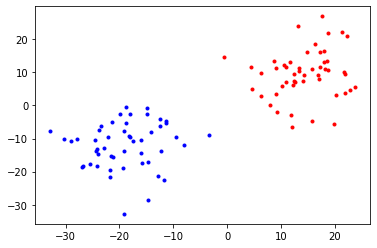

In [140]:
plt.plot(X[0,:], X[1,:], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.show()

In [141]:
lambd = cp.Variable(shape=(100,))
gamma = cp.Variable(shape=(100,))

X2 = X[[0, 45], :]
Y2 = Y[[0, 45], :]

M = np.concatenate((X[[0, 45], :], -Y[[0, 45], :]), axis=1)
D = M.T @ M + np.eye(M.shape[1]) * 1e-5

In [142]:
print(D.shape)
print(M.shape)
print(np.all(np.linalg.eigvals(D) >= 0))
print(np.linalg.eigvals(D))

(100, 100)
(2, 100)
True
[5.97777013e+04+0.00000000e+00j 5.05205869e+03+0.00000000e+00j
 9.99999914e-06+3.56566968e-13j 9.99999914e-06-3.56566968e-13j
 1.00000007e-05+1.56330920e-13j 1.00000007e-05-1.56330920e-13j
 9.99999925e-06+0.00000000e+00j 1.00000006e-05+3.92978566e-14j
 1.00000006e-05-3.92978566e-14j 9.99999934e-06+1.30271641e-14j
 9.99999934e-06-1.30271641e-14j 9.99999938e-06+0.00000000e+00j
 1.00000006e-05+0.00000000e+00j 9.99999944e-06+0.00000000e+00j
 1.00000005e-05+0.00000000e+00j 1.00000005e-05+0.00000000e+00j
 1.00000005e-05+0.00000000e+00j 1.00000005e-05+0.00000000e+00j
 9.99999948e-06+0.00000000e+00j 9.99999951e-06+9.82672042e-15j
 9.99999951e-06-9.82672042e-15j 9.99999954e-06+2.28661779e-14j
 9.99999954e-06-2.28661779e-14j 1.00000004e-05+0.00000000e+00j
 1.00000004e-05+0.00000000e+00j 9.99999954e-06+0.00000000e+00j
 1.00000003e-05+2.83239184e-14j 1.00000003e-05-2.83239184e-14j
 1.00000004e-05+0.00000000e+00j 9.99999959e-06+0.00000000e+00j
 9.99999960e-06+0.00000000e+00

In [143]:
k = 2
C = 0.1
objective = cp.Minimize( -cp.sum(lambd) + 0.5*cp.quad_form(lambd, D) + (lambd[0]+gamma[0])**(k/(k-1))/(k * C)**(k/(k-1)) * (1-1/k))

constraints= [lambd >= 0, cp.sum(lambd[0:50] - lambd[50:100]) == 0, lambd <= (lambd[0]+gamma[0]), lambd+gamma==C*np.ones(100)]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS, verbose=False)

0.11947513618523274

In [144]:
lambd.value

array([-2.95836278e-11, -6.39056232e-11, -2.98641873e-11, -4.42272195e-11,
       -1.76826883e-11, -3.15721478e-11, -5.06290838e-11, -4.40296819e-11,
       -3.33453205e-11, -4.24184860e-11, -2.85306700e-11, -4.74252209e-11,
       -4.30541530e-11, -4.93138624e-11, -3.58905757e-11, -4.00262776e-11,
       -4.71840773e-11, -5.39329526e-11, -3.09344338e-11, -3.06565582e-11,
       -4.62923655e-11, -2.10633765e-11, -3.61220333e-11, -1.83253569e-11,
       -5.28438845e-11, -4.25673203e-11, -4.51092706e-11, -2.17328962e-11,
       -3.10480284e-11, -4.28590863e-11, -2.48943743e-11, -2.27558199e-11,
       -2.34650571e-11, -3.07273229e-11, -3.81970612e-11, -4.86071958e-11,
        5.52502493e-03, -6.73419961e-11, -2.50341211e-11, -3.54197790e-11,
       -2.44864280e-11, -4.36933217e-11, -5.24848128e-11, -6.15189102e-11,
       -2.14636355e-11, -1.65732579e-11, -4.97874972e-11, -3.70810033e-11,
       -2.17071716e-11, -3.43630058e-11,  4.02060943e-11,  3.44331853e-11,
        2.99277397e-11,  

In [145]:
gamma.value + lambd.value

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [146]:
w = np.sum(np.multiply(lambd.value,M), axis=1)

In [147]:
print(w.shape)
print(M[:, 23].shape)

(2, 1)
(2, 1)


In [148]:
index = np.argmax(lambd.value)

In [149]:
b = 1 - (w.T@M[:,index])[0,0]

In [150]:
b

0.649601760852548

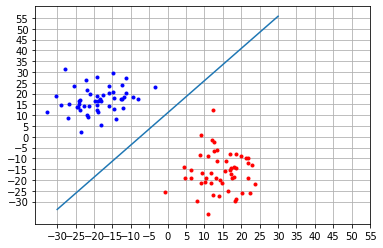

In [151]:
# i1 = 0
# i2 = 2
# plt.plot(X[i1,:], X[i2,:], 'r.')
# plt.plot(Y[i1,:], Y[i2,:], 'b.')
# x = np.linspace(-10, 0, 100)
# y = -(w[i1, 0]*x + b)/w[i2, 0]
# plt.plot(x, y)
# plt.show()
i1 = 0
i2 = 1
plt.plot(X2[i1,:], X2[i2,:], 'r.')
plt.plot(Y2[i1,:], Y2[i2,:], 'b.')
x = np.linspace(-30, 30, 100)
y = -(w[i1,0]*x + b)/w[i2,0]


# print(y)
plt.plot(x, y)
plt.grid()
plt.xticks(np.arange(-30, 60, 5))
plt.yticks(np.arange(-30, 60, 5))
plt.show()

In [152]:
print((w[i1,0]*X2[i1,:] + w[i2,0]*X2[i2,:] + b))#/np.linalg.norm(w))
print((w[i1,0]*Y2[i1,:] + w[i2,0]*Y2[i2,:] + b))#/np.linalg.norm(w))

[[2.92635214 2.09649283 2.13406455 2.67308504 1.7849942  2.99729392
  3.9687024  3.21531071 3.02094093 3.06049967 2.68479881 3.54537537
  2.10146631 2.70899744 3.16425988 2.64899614 2.75817024 3.29000855
  1.90687559 3.04668766 2.92126893 3.13530946 3.98936666 1.86963751
  3.47056632 2.44247069 3.93853604 2.91386654 2.47827337 1.86819989
  3.40714036 2.59628822 2.18246403 3.13707701 3.31045186 2.32987046
  1.         3.70062756 2.14776682 2.95718208 3.25255027 4.13069637
  3.98361987 3.0669078  3.07707571 1.39713768 2.17848481 3.30150137
  2.73894434 3.6770925 ]]
[[-1.7719052  -2.2944616  -2.44684151 -2.62828232 -2.88718648 -1.25730354
  -2.9439826  -2.73701601 -3.08188767 -1.68195699 -1.56714731 -2.44407896
  -1.84494595 -1.48681316 -1.4463699  -3.61615637 -2.34142421 -1.37454509
  -1.19431874 -1.89975357 -2.3729155  -1.9502513  -1.47819409 -2.34893781
  -2.14208095 -2.28562159 -2.04428846 -1.84428163 -2.11754942 -1.92726786
  -1.65919449 -1.84881248 -2.02008835 -1.96373337 -2.1782150

In [153]:
print(1/np.linalg.norm(w))

9.512873162083164
